### **Use: https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install keras_tuner && touch /root/.ipython/profile_default/startup/00-first.py && echo "import keras_tuner" >> /root/.ipytn/profile_default/startup/00-first.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.9 MB/s eta 0:00:00
/bin/bash: line 1: /root/.ipytn/profile_default/startup/00-first.py: No such file or directory


### **Imports**

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks, Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D,Input,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import keras_tuner as kt

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [4]:
x_train = np.load('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Data/Processed Data/42850/x_train.npy')
x_val = np.load('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Data/Processed Data/42850/x_val.npy')
x_test = np.load('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Data/Processed Data/42850/x_test.npy')

y_train = np.load('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Data/Processed Data/42850/y_train.npy')
y_val = np.load('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Data/Processed Data/42850/y_val.npy')
y_test = np.load('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Data/Processed Data/42850/y_test.npy')

In [5]:
Test, Precision, Recall, F1, ROC_AUC = [], [], [], [], []

In [6]:
y_test = np.array([np.argmax(i) for i in y_test])

### **CNN**

In [ ]:
def model_builder(hp):
    model=Sequential()
    model.add(Conv2D(32,(3,3), padding='same',input_shape=(32,32,3), activation='relu')) #apply filters to reduce dimensions of input
    model.add(MaxPooling2D(pool_size=(2,2), padding='same')) #reduce input, make assumptions in a smaller region
    model.add(Dropout(hp.Choice('drop_out', [0.1, 0.2, 0.3, 0.4])))
    model.add(Flatten())
    for i in range(hp.Choice('layers', [1, 2, 4, 6, 8]),):
        model.add(Dense(hp.Int('neurons', min_value=100, max_value=200, step=5), activation="relu"))
    model.add(Dense(2, activation='softmax'))#last layer is number of classes
    model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.legacy.Adam(learning_rate=hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001, 0.00001])), metrics=['accuracy'])
    return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='accuracy',
                     max_epochs=10,
                     factor=3,
                     overwrite = True)

In [ ]:
stop_early = callbacks.EarlyStopping(monitor='accuracy', patience=5, min_delta=0.001)
tuner.search(x_train, y_train,validation_data = (x_val, y_val), epochs=50, callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of neurons is {best_hps.get('neurons')}, optimal drop_out is {best_hps.get('drop_out')}, optimal number of layers is {best_hps.get('layers')}, optimal learning rate is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 32s]
accuracy: 0.5193532109260559

Best accuracy So Far: 0.98496413230896
Total elapsed time: 00h 07m 41s

The hyperparameter search is complete. The optimal number of neurons is 190, optimal drop_out is 0.1, optimal number of layers is 6, optimal learning rate is 0.001.



In [7]:
def cnn_model():
    model=Sequential()
    model.add(Conv2D(32,(3,3), padding='same',input_shape=(32,32,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(190, activation="relu"))
    model.add(Dense(190, activation="relu"))
    model.add(Dense(190, activation="relu"))
    model.add(Dense(190, activation="relu"))
    model.add(Dense(190, activation="relu"))
    model.add(Dense(190, activation="relu"))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

model = cnn_model()

In [8]:
early_stopping = callbacks.EarlyStopping(monitor='accuracy', patience=20,  min_delta=0.1)
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=64, verbose=2, callbacks = [early_stopping])

Epoch 1/100
469/469 - 5s - loss: 0.2399 - accuracy: 0.8998 - val_loss: 0.1875 - val_accuracy: 0.9342 - 5s/epoch - 11ms/step
Epoch 2/100
469/469 - 1s - loss: 0.1652 - accuracy: 0.9378 - val_loss: 0.1627 - val_accuracy: 0.9377 - 1s/epoch - 3ms/step
Epoch 3/100
469/469 - 2s - loss: 0.1477 - accuracy: 0.9447 - val_loss: 0.1620 - val_accuracy: 0.9398 - 2s/epoch - 3ms/step
Epoch 4/100
469/469 - 1s - loss: 0.1235 - accuracy: 0.9536 - val_loss: 0.1775 - val_accuracy: 0.9417 - 1s/epoch - 3ms/step
Epoch 5/100
469/469 - 1s - loss: 0.1113 - accuracy: 0.9577 - val_loss: 0.1615 - val_accuracy: 0.9375 - 1s/epoch - 3ms/step
Epoch 6/100
469/469 - 1s - loss: 0.0895 - accuracy: 0.9673 - val_loss: 0.3025 - val_accuracy: 0.9125 - 1s/epoch - 3ms/step
Epoch 7/100
469/469 - 1s - loss: 0.0739 - accuracy: 0.9728 - val_loss: 0.1894 - val_accuracy: 0.9358 - 1s/epoch - 3ms/step
Epoch 8/100
469/469 - 2s - loss: 0.0620 - accuracy: 0.9775 - val_loss: 0.2018 - val_accuracy: 0.9382 - 2s/epoch - 3ms/step
Epoch 9/100
469

In [11]:
history = pd.DataFrame(model.history.history)
history.to_csv('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Models/Quebec Models/Training Results/Train_CNN.csv', index = False)

Maximum validation accuracy: 0.9425904154777527


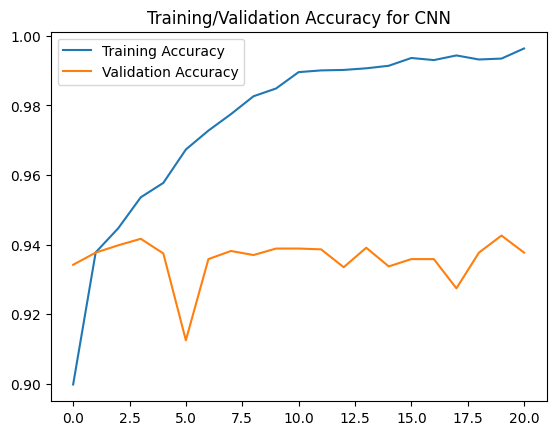

In [12]:
history = pd.DataFrame(model.history.history)
print("Maximum validation accuracy: {}".format(history['val_accuracy'].max()))
plt.title('Training/Validation Accuracy for CNN')
plt.plot(history['accuracy'], label = 'Training Accuracy')
plt.plot(history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

In [13]:
y_hat_cnn = np.array([np.argmax(i) for i in model.predict(x_test)])

268/268 [==============================] - 1s 2ms/step


Testing Accuracy
Accuracy: 0.9334889148191365
Precision: 0.9139224676948728
Recall: 0.9654337296345222
F1 Score: 0.9389721627408995
ROC-AUC Score: 0.9314507277765461


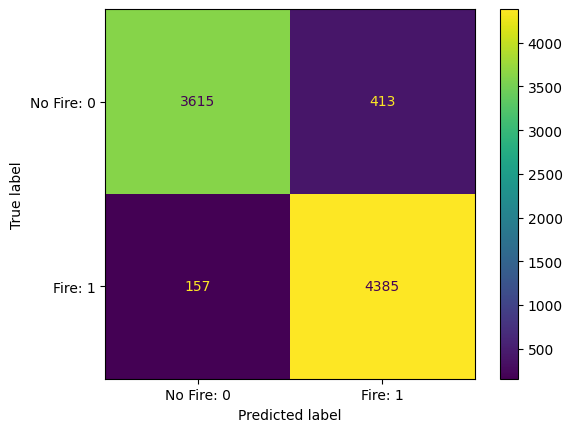

In [14]:
print("Testing Accuracy")
print("Accuracy: {}".format(accuracy_score(y_true = y_test, y_pred = y_hat_cnn)))
print("Precision: {}".format(precision_score(y_true = y_test, y_pred = y_hat_cnn))) #True positive predictions/Total positive predictions
print("Recall: {}".format(recall_score(y_true = y_test, y_pred = y_hat_cnn)))#True positive predictions/Total number of positive instances
print("F1 Score: {}".format(f1_score(y_true = y_test, y_pred = y_hat_cnn)) )#Harmonic mean of precision and recall
print("ROC-AUC Score: {}".format(roc_auc_score(y_true = y_test, y_score = y_hat_cnn)))

confusion_matrix = metrics.confusion_matrix(y_true = y_test, y_pred = y_hat_cnn)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels= ["No Fire: 0", "Fire: 1"] )
cm_display.plot()
plt.show()

In [15]:
Test.append(accuracy_score(y_true = y_test, y_pred = y_hat_cnn))
Precision.append(precision_score(y_true = y_test, y_pred =y_hat_cnn))
Recall.append(recall_score(y_true = y_test, y_pred =y_hat_cnn))
F1.append(f1_score(y_true = y_test, y_pred = y_hat_cnn))
ROC_AUC.append(roc_auc_score(y_true = y_test, y_score =y_hat_cnn))

### **Results**

In [16]:
data_table = pd.DataFrame({'Models': ['CNN'], 'Accuracy':Test, 'Precision': Precision, 'Recall': Recall, 'F1_Score': F1, 'ROC-AUC':ROC_AUC})
data_table.sort_values('Accuracy', inplace=True, ascending = False)
data_table.reset_index(drop = True)

,Models,Accuracy,Precision,Recall,F1_Score,ROC-AUC
0,CNN,0.933489,0.913922,0.965434,0.938972,0.931451


In [17]:
data_table.to_csv('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Models/Quebec Models/Separated Results/Results_CNN.csv', index = False)